In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
num_epochs = 50
batch_size = 100
learning_rate = 1e-3

In [3]:
train_dataset = dsets.MNIST(root='data/', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
test_dataset = dsets.MNIST(root='data/', 
                           train=False, 
                           transform=transforms.ToTensor())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [5]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [13]:
class ConvolutionalAutoencoder(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            #28*28*1 -> 28*28*4
            nn.Conv2d(in_channels=1,out_channels=4,kernel_size=(3, 3),stride=(1, 1),padding=1),#o = (w - k + 2*p)/s + 1
            nn.LeakyReLU(True),
            #28*28*4 -> 14*4*4
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2),padding=0),
            #14*14*4 -> 14*14*8
            nn.Conv2d(in_channels=4,out_channels=8,kernel_size=(3,3),stride=(1,1),padding=1),
            nn.LeakyReLU(True),
            #14*14*8 -> 7*7*8
            nn.MaxPool2d(kernel_size=(2,2),stride=(2,2),padding=0)
        )
        self.decoder = nn.Sequential(
            #7*7*8 -> 14*14*8
            nn.Upsample(scale_factor=2,mode='nearest'),
            #14*14*8 -> 14*14*4
            nn.Conv2d(in_channels=8,out_channels=4,stride=(1,1),kernel_size=(3,3),padding=1),
            nn.LeakyReLU(True),
            #14*14*4 -> 28*28*4
            nn.Upsample(scale_factor=2,mode='nearest'),
            nn.Conv2d(in_channels=4,out_channels=1,stride=(1,1),kernel_size=(3,3),padding=1),
            nn.LeakyReLU(True),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [14]:
model = ConvolutionalAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [15]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        if((i+1) % 100 == 0):
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


Epoch [1/50], Step [100/600], Loss: 0.0393
Epoch [1/50], Step [200/600], Loss: 0.0272
Epoch [1/50], Step [300/600], Loss: 0.0213
Epoch [1/50], Step [400/600], Loss: 0.0172
Epoch [1/50], Step [500/600], Loss: 0.0160
Epoch [1/50], Step [600/600], Loss: 0.0131
Epoch [2/50], Step [100/600], Loss: 0.0124
Epoch [2/50], Step [200/600], Loss: 0.0115
Epoch [2/50], Step [300/600], Loss: 0.0108
Epoch [2/50], Step [400/600], Loss: 0.0109
Epoch [2/50], Step [500/600], Loss: 0.0103
Epoch [2/50], Step [600/600], Loss: 0.0103
Epoch [3/50], Step [100/600], Loss: 0.0108
Epoch [3/50], Step [200/600], Loss: 0.0098
Epoch [3/50], Step [300/600], Loss: 0.0095
Epoch [3/50], Step [400/600], Loss: 0.0096
Epoch [3/50], Step [500/600], Loss: 0.0087
Epoch [3/50], Step [600/600], Loss: 0.0087
Epoch [4/50], Step [100/600], Loss: 0.0082
Epoch [4/50], Step [200/600], Loss: 0.0086
Epoch [4/50], Step [300/600], Loss: 0.0090
Epoch [4/50], Step [400/600], Loss: 0.0091
Epoch [4/50], Step [500/600], Loss: 0.0083
Epoch [4/50

Epoch [32/50], Step [200/600], Loss: 0.0051
Epoch [32/50], Step [300/600], Loss: 0.0056
Epoch [32/50], Step [400/600], Loss: 0.0057
Epoch [32/50], Step [500/600], Loss: 0.0055
Epoch [32/50], Step [600/600], Loss: 0.0053
Epoch [33/50], Step [100/600], Loss: 0.0052
Epoch [33/50], Step [200/600], Loss: 0.0058
Epoch [33/50], Step [300/600], Loss: 0.0059
Epoch [33/50], Step [400/600], Loss: 0.0051
Epoch [33/50], Step [500/600], Loss: 0.0053
Epoch [33/50], Step [600/600], Loss: 0.0053
Epoch [34/50], Step [100/600], Loss: 0.0054
Epoch [34/50], Step [200/600], Loss: 0.0051
Epoch [34/50], Step [300/600], Loss: 0.0059
Epoch [34/50], Step [400/600], Loss: 0.0052
Epoch [34/50], Step [500/600], Loss: 0.0056
Epoch [34/50], Step [600/600], Loss: 0.0055
Epoch [35/50], Step [100/600], Loss: 0.0049
Epoch [35/50], Step [200/600], Loss: 0.0047
Epoch [35/50], Step [300/600], Loss: 0.0053
Epoch [35/50], Step [400/600], Loss: 0.0052
Epoch [35/50], Step [500/600], Loss: 0.0056
Epoch [35/50], Step [600/600], L

In [16]:
test_images,_ = next(iter(test_loader))

In [17]:
test_output = model(test_images)

In [18]:
def validate_op(n_images,orig_images,decoded_images,image_width):
    fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    plt.ylabel("Decoded (Bottom)   |   Original(Top)")
    orig_images = orig_images[:n_images]
    decoded_images = decoded_images[:n_images]
    
    
    for i in range(n_images):
        for ax, img in zip(axes, [orig_images, decoded_images]):
            ax[i].imshow(img[i].detach().reshape((image_width, image_width)),cmap = 'gray')

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


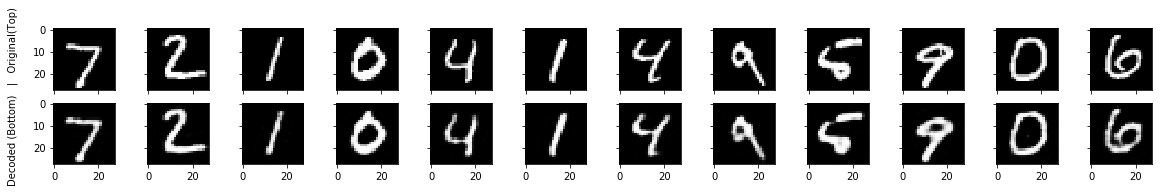

In [21]:
validate_op(12,test_images,test_output,28)